<a href="https://colab.research.google.com/github/leomanfree/Creative_Fork_FastAI_LearnSprint/blob/main/Creative_Fork_FastAI_LearnSprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Creative Fork – Fast.ai Learn Sprint

This repo contains my 3-day Learn Sprint using fast.ai.  
Day 1: I trained and tested a computer vision model that classifies cat and dog breeds using the Oxford Pets dataset.

## 🔧 What I did
- Forked and remixed Muellerzr's notebook
- Trained a ResNet34 model on Colab
- Fine-tuned it and tested it on external images
- Documented the whole process with comments and logs

## 🖼️ Example output
Prediction: `shiba_inu` with 91% confidence ✅

## 🗂️ Files
- `Creative_Fork_FastAI_LearnSprint.ipynb`

---

More coming soon. This is just Day 1. 🚀


# Requirements:

* A Google account to use Google Colaboratory (what I am in right now)
* A Paperspace account for Natural Language Processing

# Environment setup

Google Colaboratory - Free GPU's

Go to [here](colab.research.google.com) to start using it.

File -> Open notebook

![](https://i.imgur.com/pGCkS9G.png)

Select from GitHub and use the following URL: muellerzr/A-walk-with-fastai

![](https://i.imgur.com/9O1LMZt.png)

Choose open in a new tab

![](https://i.imgur.com/NuL67k9.png)

And now your screen looks similar to below! (With what I am using instead)

![alt text](https://i.imgur.com/n4mQ2qj.png)

## Changing our processer to a GPU

* 'Runtime'
* 'Change runtime type'
* 'Runtime type' should be 'Python 3'
* 'Hardware accelerator' should be 'GPU'

## Initial Run Warning (For pulling from GitHub)

***If you get a pop up saying 'Warning: This notebook was not authored by Google,' check 'Reset all runtimes before running' and click 'Run Anyway'***

![alt text](https://course.fast.ai/images/colab/02.png)

## Saving your work

For now this will just save the notebook on their cloud, we will look next week how to utilize your Google Drives!

![alt text](https://course.fast.ai/images/colab/09.png)

# What is fastai?

* Neural-network based library
* Helps make state-of-the-art more accessible
* Supports five datatypes:
  * Computer vision (fastai.vision)
  * Tabular data (fastai.tabular)
  * Text (fastai.text)
  * Collaborative filtering (fastai.collab) - **not going over**

# What is our goal today?

* Make an image classifier for Cats and Dogs
* Make our own image classifier
* Start to understand the DataBlock API

# Let's grab the library:

I'm installing the fastai library (v2) which makes it easier to build and train models.
Since this is Colab, I need to install it every time I restart the runtime.

In [1]:
#Run once per session
!pip install fastai -q --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.9 MB/s eta 0:00:00


Now we can import the `fastai` libraries (fastai 2.0!)

Today we will be using the `basics`, `callback`, and `vision` libraries as we have a **vision** task

Importing everything needed for computer vision with fastai
from fastai.vision.all import *

In [2]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

Overall process using machine learning models and fastai:
1. Make our `DataLoaders`
2. Make a `Learner` with some "equipment"
3. Train

## Looking at Data

We'll be trying to identify between 12 species of cats and 25 species of dogs (37 in total). Five years ago, the best was 59% with seperate classifications for the image, head, and body of the animal. Let's try just doing one image for everything.

But before anything, we need data!

In [3]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = None) -> 'Path'
    Download `url` using `FastDownload.get`



In [4]:
untar_data??

Let's download the dataset

### Downloading the Oxford-IIIT Pet dataset
Contains ~7k images of cats and dogs (37 breeds)
path = untar_data(URLs.PETS)

In [5]:
path = untar_data(URLs.PETS)

And set our seed

In [6]:
np.random.seed(2)

How will our data look?

In [7]:
path.ls()[:3]

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

Let's build a `DataLoaders`.

In [8]:
path = untar_data(URLs.PETS)
fnames = get_image_files(path/'images')
pat = r'(.+)_\d+.jpg$'

Some  basic transforms

In [9]:
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs=64

`ImageDataBunch` (renamed to ImageDataLoaders) - highest level API

In [10]:
dls = ImageDataLoaders.from_name_re(path, fnames, pat, batch_tfms=batch_tfms,
                                   item_tfms=item_tfms, bs=bs)

What is the API?

* See PPT

Let's rebuild using the `DataBlock` api - Medium Level

In [11]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [12]:
path_im = path/'images'

In [13]:
dls = pets.dataloaders(path_im, bs=bs)

We can take a look at a batch of our images using `show_batch` and pass in a aximum number of images to show, and how large we want to view them as

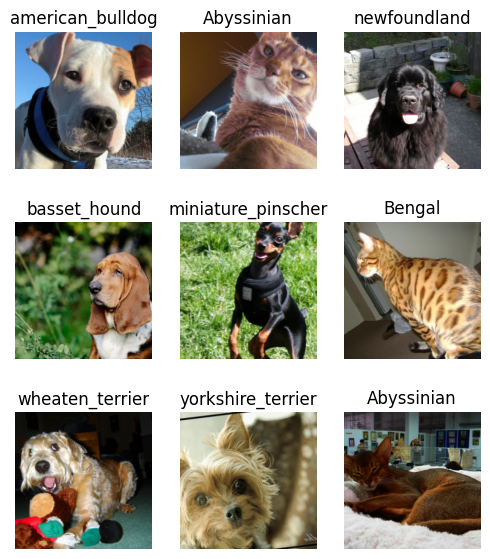

In [14]:
dls.show_batch(max_n=9, figsize=(6,7))

If we want to see how many classes we have, and the names of them we can simply call `dls.vocab`. The first is the number of classes, the second is the names of our classes. You may notice this looks a bit odd, that's because this `L` is a new invention of Jeremy and Sylvian. Essentially it's a Python list taken to the extreme.

Before if we wanted to grab the index for the name of a class (eg. our model output 0 as our class), we would need to use `data.c2i` to grab the Class2Index mapping. This is still here, it lives in `dls.vocab.o2i`

In [15]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [16]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

## Time to make and train a model!

We will be using a convolutional neural network backbone and a fully connected head with a single hidden layer as our classifier. Don't worry if thats a bunch of nonsense for now. Right now, just know this: we are piggybacking off of a model to help us classify images into 37 categories.

First, we need to make our Neural Network and our `Learner` like before.

A `Learner` needs (on a base level):

* `DataLoaders`
* Some architecture
* A evaluation metric
* A loss function
* An optimizer

We'll also use `mixed_precision` (`fp16`)

In [17]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 101MB/s]


Some assumptions being made here:

* Loss function is assumed as classification, so `CrossEntropyFlat`
* Optimizer is assumed to be Adam

Now, we can train it! We will train it for four cycles through all our data

### ⏳ Long Training Section
This is where I trained the model for the first time. It took almost 3 hours, so I left it running while taking breaks and reflecting on what was happening under the hood.


Training the model for 4 epochs with frozen layers
⚠️ Each epoch takes ~40 min on Colab Free (total ~2h 30min!)
learn.fit_one_cycle(4)


In [18]:
learn.fit_one_cycle(4)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.873583,0.368863,0.112991,40:46
1,0.671093,0.271055,0.087957,40:45
2,0.377671,0.228186,0.068336,40:55
3,0.274972,0.226686,0.068336,40:09


In [19]:
learn.save('stage_1')

Path('models/stage_1.pth')

## Lets look at our results

With the model trained, let's look at where our it might've messed up. What species did it have trouble differentiating between? So long as the misidentifications are not too crazy, our model is actually working.

Let's plot our losses and make a confusion matrix to visualize this. Below checks to make sure that all pieces we need are available

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

`plot_top_losses` needs `x` number of images to use, and a figure size.

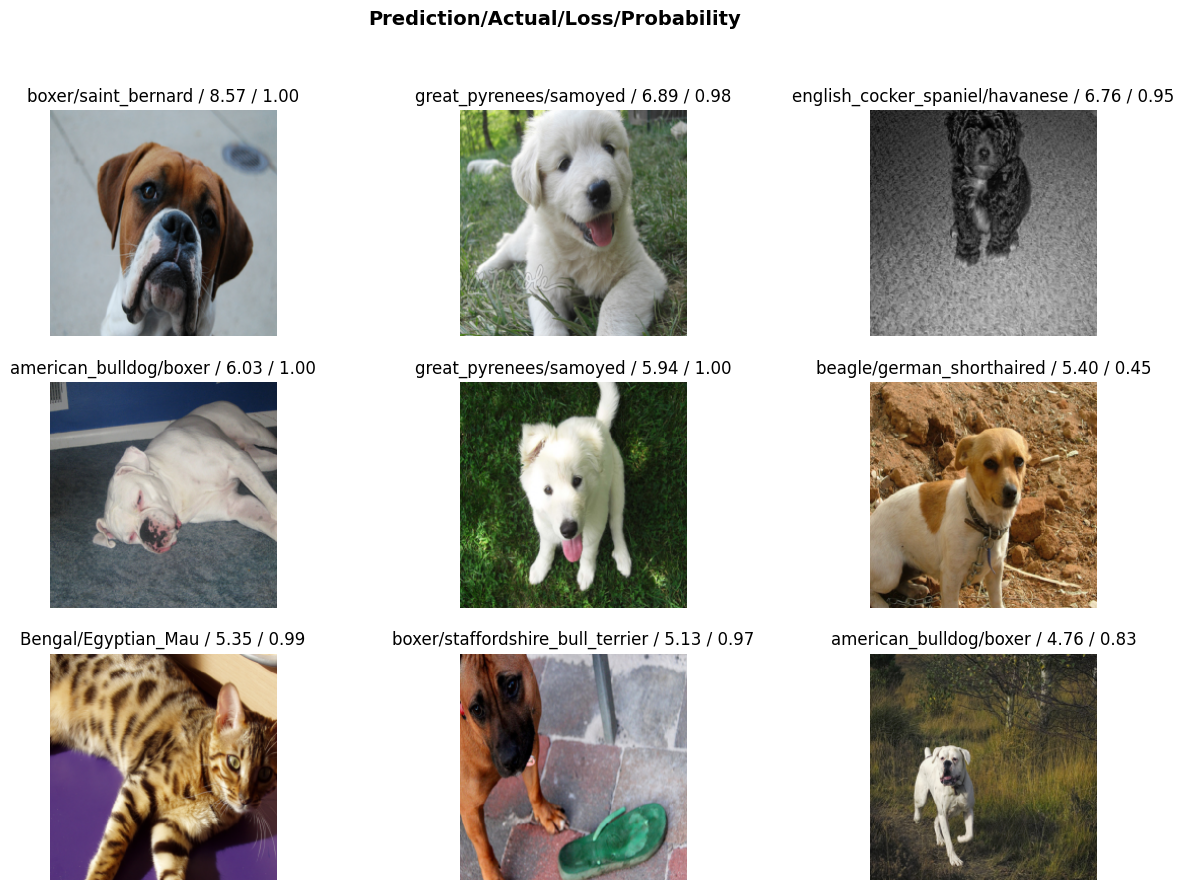

In [21]:
interp.plot_top_losses(9, figsize=(15,10))

`plot_confusion_matrix` just needs a figure size. dpi adjusts the quality

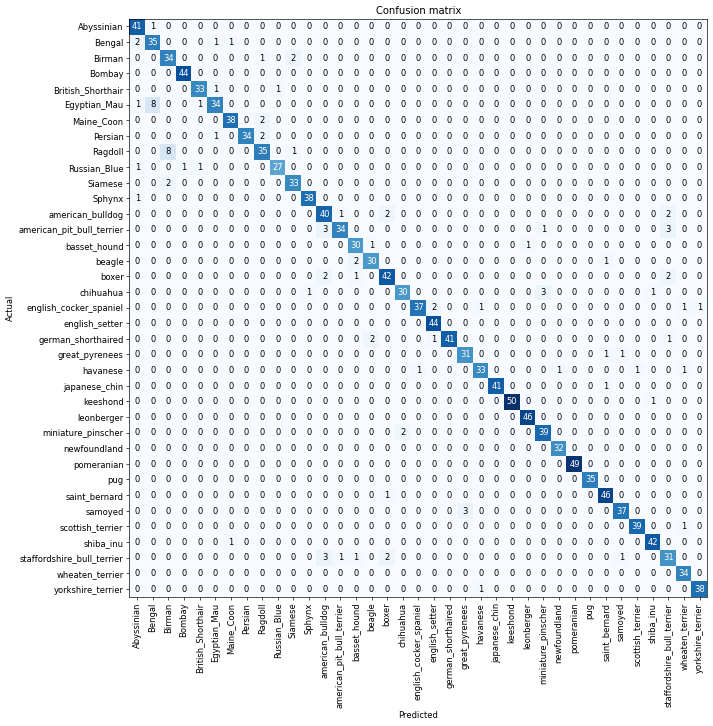

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

We can also directly grab our most confused (A raw version of the confusion matrix), and pass in a threshold

In [23]:
interp.most_confused(min_val=3)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


[('Egyptian_Mau', 'Bengal', np.int64(8)),
 ('Ragdoll', 'Birman', np.int64(8)),
 ('american_pit_bull_terrier', 'american_bulldog', np.int64(3)),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', np.int64(3)),
 ('chihuahua', 'miniature_pinscher', np.int64(3)),
 ('samoyed', 'great_pyrenees', np.int64(3)),
 ('staffordshire_bull_terrier', 'american_bulldog', np.int64(3))]

## Unfreezing our data, fine-tuning, and our learning rates

So, we have the model. Let's fine tune it. First, we need to load our model back in.

In [ ]:
learn.load('stage_1');

Now we will *unfreeze* and train more

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.159999,3.468442,0.655616,57:52
1,1.052002,1.061123,0.307848,57:41
2,0.582479,0.519205,0.154263,57:39
3,0.300148,0.398480,0.124493,57:12


## Now when we `unfreeze`, we unfreeze *all* the layers. So to show how a difference of a proper learning rate looks, let's load in those old weights and try using `lr_find()`

In [ ]:
learn.load('stage_1');

SuggestedLRs(valley=3.0199516913853586e-05)

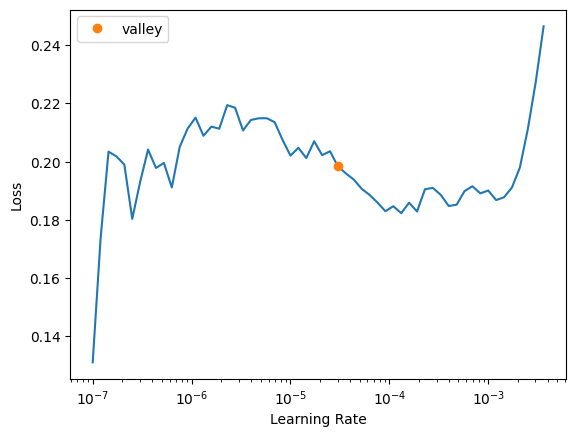

In [29]:
learn.lr_find()

Alright so if we look here, we don't start really spiking our losses until ~10^-2 so a good spot is between 1e-6 and 1e-4, let's do that!

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.304765,0.138828,0.047361,01:14
1,0.262109,0.130033,0.043302,01:14
2,0.210819,0.133986,0.041949,01:14
3,0.196996,0.129849,0.040595,01:15


We can see that picking a proper learning rate can help speed things up!

In [ ]:
learn.save('stage_2')

## Now lets try with a resnet50!

If you need to restart your kernel due to memory errors I've attached the `dls` code below

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=32)

Go ahead and try running the below code yourself. You *should* see a higher increase in accuracy!

Steps to try:

1. Create your Learner
2. Find a learning rate
3. Fit for 5 epochs
4. Unfreeze and fit for two more

In [ ]:
### Try here! ###

## The answer is hidden under here

In [ ]:
learn = cnn_learner(data, resnet50, pretrained=True, metrics=error_rate)

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, lr_max=slice(3e-4, 3e-3))

In [ ]:
learn.save('resnet50')

In [ ]:
learn.load('resnet50')
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=4e-4)

In [ ]:
learn.save('resnet50')

In [36]:
from fastai.vision.all import PILImage

img = img = PILImage.create('sample_data/Cane11.jpg')
pred, pred_idx, probs = learn.predict(img)
print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.4f}")

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


Prediction: shiba_inu; Probability: 0.9162


<Axes: title={'center': 'Prediction: shiba_inu (91.62%)'}>

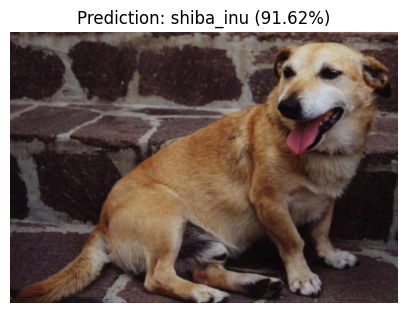

In [37]:
img.show(title=f"Prediction: {pred} ({probs[pred_idx]:.2%})")